<a href="https://colab.research.google.com/github/Dasango/AmazontProject/blob/main/Financial_Volatility_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed

Descargando datos de Google...
Datos listos. Últimas filas:
                Precio
Date                  
2024-12-24  195.344940
2024-12-26  194.836945
2024-12-27  192.007996
2024-12-30  190.493958
2024-12-31  188.561508



/tmp/ipython-input-3109195062.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Retorno_Log'] = np.log(data['Precio'] / data['Precio'].shift(1))
/tmp/ipython-input-3109195062.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Volatilidad_Real'] = data['Retorno_Log'].rolling(window=21).std()
/tmp/ipython-input-3109195062.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

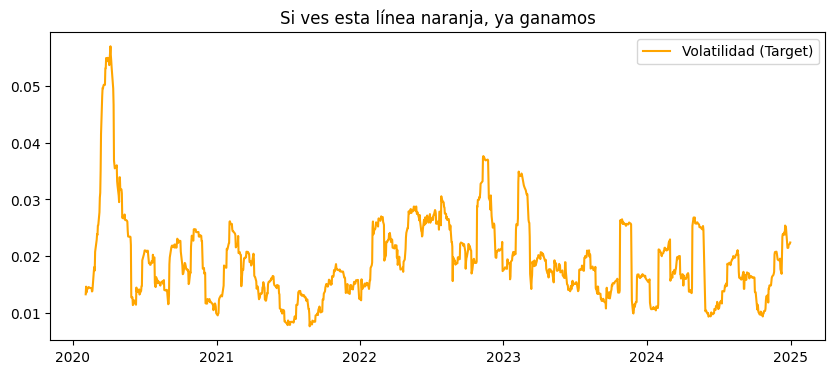

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Descargar datos de Google
print("Descargando datos de Google...")

# TRUCO: Pedimos que NO agrupe por ticker para intentar obtener una tabla plana
# Si esto falla en tu versión, el bloque 'try/except' de abajo lo arregla
try:
    df = yf.download('GOOGL', start='2020-01-01', end='2025-01-01', auto_adjust=True, multi_level_index=False)
except TypeError:
    # Si tu versión de yfinance es vieja y no acepta multi_level_index
    df = yf.download('GOOGL', start='2020-01-01', end='2025-01-01', auto_adjust=True)

# 2. Limpieza de columnas (El arreglo definitivo)
# Si es un MultiIndex (niveles complejos), nos quedamos con la columna 'Close'
if isinstance(df.columns, pd.MultiIndex):
    # Buscamos 'Close' en el nivel superior (level=0)
    # Como .xs devuelve un DataFrame, NO usamos .to_frame()
    data = df.xs('Close', axis=1, level=0)
else:
    # Si es un índice simple
    data = df[['Close']]

# Renombramos para estandarizar
data.columns = ['Precio']

# 3. Verificación
if data.empty:
    raise ValueError("¡Error! El DataFrame está vacío. Revisa tu conexión a internet.")

print(f"Datos listos. Últimas filas:\n{data.tail()}")

# --- A PARTIR DE AQUÍ SIGUE TU CÓDIGO DE INGENIERÍA ---
# (Copia aquí la parte de Retorno_Log y Volatilidad del mensaje anterior)
# ...
data['Retorno_Log'] = np.log(data['Precio'] / data['Precio'].shift(1))
data['Volatilidad_Real'] = data['Retorno_Log'].rolling(window=21).std()
data.dropna(inplace=True)

# Visualización rápida para confirmar
plt.figure(figsize=(10, 4))
plt.plot(data['Volatilidad_Real'], label='Volatilidad (Target)', color='orange')
plt.title('Si ves esta línea naranja, ya ganamos')
plt.legend()
plt.show()